# Qiskit Intro

## Atoms of Computation

In [52]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import random
import pylatexenc
import math
from prettyprinter import pprint

qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.1', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': '0.9.5', 'qiskit': '0.34.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

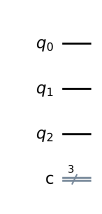

In [2]:
%matplotlib inline
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw()  # returns a drawing of the circuit

### Measuring

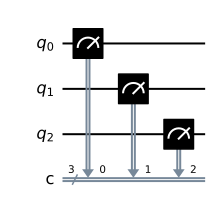

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

In [4]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

In [5]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

### NOT or X gate

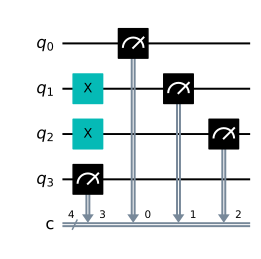

In [6]:
qc = QuantumCircuit(4, 4)
qc.x([1,2]) 
qc.measure([0,1,2,3], [0,1,2,3])
qc.draw()

In [7]:
job = sim.run(qc)
result = job.result()
result.get_counts()

{'0110': 1024}

### Half Adder

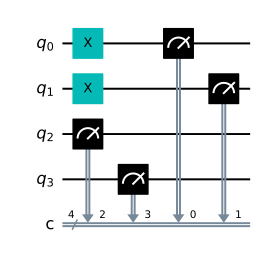

In [8]:
qc = QuantumCircuit(4, 4)
qc.x([0,1]) 
qc.measure([0,1,2,3], [0,1,2,3])
qc.draw()

### CNOT Gate

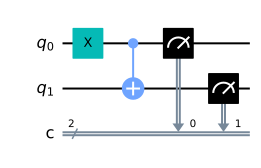

Result:  {'11': 1024}


In [9]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

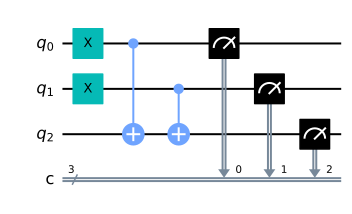

Result:  {'011': 1024}


In [10]:
# Create quantum circuit that will calculate q0 XOR q1
qc = QuantumCircuit(3, 3)
qc.x(0)
qc.x(1)
qc.cx(0,2)
qc.cx(1,2)
qc.measure([0,1,2], [0,1,2])
display(qc.draw())     # display a drawing of the circuit
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

### Toffoli Gate

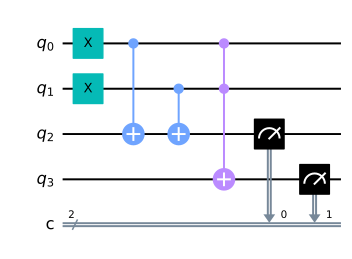

Result:  {'10': 1024}


In [11]:
qc = QuantumCircuit(4, 2)

qc.x(0)
qc.x(1)

qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure([2,3], [0,1])
display(qc.draw())

job = sim.run(qc)
result = job.result()
print("Result: ", result.get_counts())

## What is Quantum?

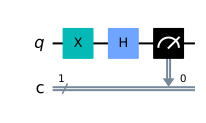

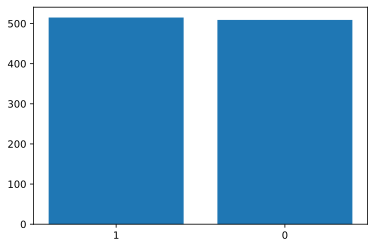

Result: {'1': 499, '0': 525}


In [14]:
# Hadamard Gate

qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc.measure([0],[0])
display(qc.draw())

plt.bar(*zip(*(result.get_counts()).items()))
plt.show()

job = sim.run(qc)
result = job.result()
print(f"Result: {result.get_counts()}")

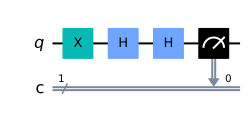

Result: {'1': 1024}


In [15]:
# Double Hadamard Gate

qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc.h(0)
qc.measure([0],[0])
display(qc.draw())

job = sim.run(qc)
result = job.result()
print(f"Result: {result.get_counts()}")

## Describing Quantum Computers

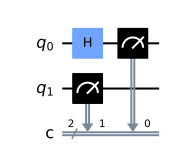

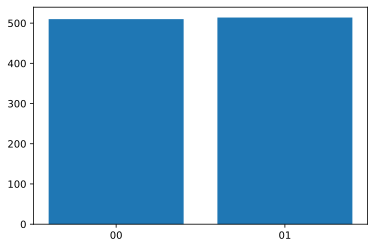

Result: {'01': 523, '00': 501}


In [22]:
# Testing to get [sqrt(1/2), sqrt(1/2), 0, 0] state vector
##                     00      01      10  11

qc = QuantumCircuit(2,2)
qc.h(0)
qc.measure([0,1],[0,1])
display(qc.draw())

plt.bar(*zip(*(result.get_counts()).items()))
plt.show()

job = sim.run(qc)
result = job.result()
print(f"Result: {result.get_counts()}")

### Try it

Find values for a, B, Y and s such that these equations are true:
a|+> + B|-> = |0>
Y|+> + S|-> = |1>

In [39]:
# a|+> + B|-> = |0>
ket_pos = np.matrix([[math.sqrt(1/2)], [math.sqrt(1/2)]])
"""
[sqrt(1/2)]
[sqrt(1/2)]

"""
ket_neg = np.matrix([[math.sqrt(1/2)], [-1*math.sqrt(1/2)]])
"""
[sqrt(1/2)]
[-sqrt(1/2)]

"""

# a = sqrt(1/2), B = sqrt(1/2)
# This is because when added, you want to get [1,0] for |0>, so both top elements must be 0.5. What times sqrt(1/2) is 0.5?
# sqrt(1/2) * x = 0.5; x = sqrt(1/2). 
# Thus you multiply the top by sqrt(1/2). But what about the bottom? Well their opposites so they cancel no matter what if
# they're multiplied by the same coefficient so sqrt(1/2) must work for both a and B. 
res = np.add(np.multiply(math.sqrt(1/2), ket_pos), np.multiply(math.sqrt(1/2),ket_neg))

print(res)

[[1.]
 [0.]]


In [55]:
# Y|+> + S|-> = |1>

ket_pos = np.matrix([[math.sqrt(1/2)], [math.sqrt(1/2)]])
"""
[sqrt(1/2)]
[sqrt(1/2)]

"""
ket_neg = np.matrix([[math.sqrt(1/2)], [-1*math.sqrt(1/2)]])
"""
[sqrt(1/2)]
[-sqrt(1/2)]

"""


# Y = sqrt(1/2), S = -sqrt(1/2)
# |1> is [0,1]
# Same logic about the sqrt(1/2) scalar and adding up. However, this time the bottom should add to 1 and the top cancel, so we
# flip the only -1 on the bottom to be posititve & thus its top to be negative & they subsequently cancel porperly when added.
res = np.add(np.multiply(math.sqrt(1/2), ket_pos), np.multiply(-1*math.sqrt(1/2),ket_neg))

print(res)

[[0.]
 [1.]]


### Quatum state validity

In [58]:
m1 = np.matrix('1;-1;1;0')
res = np.dot(math.sqrt(1/3), m1)

pprint(res)

ans = 0
for i in res:
    for j in i:
        ans += float(j**2)
        
print(ans)

# Amplitudes sqaured then all added add to 1: Valid

matrix([[ 0.57735027],
        [-0.57735027],
        [ 0.57735027],
        [ 0.        ]])
1.0


### Transition amplitude of CNOT |10> -> |01>

In reality the CNOT applied to |10> gets |10>, so theres a 0% chance of |01> and the CNOT gate matrix correctly demonstrates this with a transition amplitude of zero for |10> -> |01> and a transition amplitude of 1 for |10> -> |10>

In [67]:
CNOT = np.matrix('1,0,0,0;0,0,0,1;0,0,1,0;0,1,0,0')
onezero = np.matrix('0;0;1;0')

res = np.dot(CNOT, onezero)

pprint(CNOT)

pprint(onezero)

print(res)

matrix([[1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0]])
matrix([[0],
        [0],
        [1],
        [0]])
[[0]
 [0]
 [1]
 [0]]


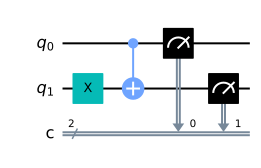

Result:  {'10': 1024}


In [64]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())